In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integ
from astropy.io import ascii
from scipy import interpolate
import scipy.stats as stats
from astropy.table import Table, Column
import readsnap as rs


plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 15


# Constants in CGS

G = 6.6726e-08
Ro = 6.96e10
Mo = 1.99e33
c = 2.9979e+10
day = 60*60*24

DistUnit = Ro
MassUnit = Mo
TimeUnit = np.sqrt(DistUnit**3/(G*MassUnit))
VelUnit = DistUnit/TimeUnit
AngMomUnit = DistUnit*VelUnit*MassUnit

SpinUnit = AngMomUnit*c/(G*Mo**2)

DensityUnit = MassUnit/(DistUnit**3)


Tday = TimeUnit/(60*60*24)

#=====================================================
# Finds index of the element in an array 
# with the closest value to "value"

def find_nearest(array,value):
        idx = (np.abs(array-value)).argmin()
#     return array[idx]
        return idx

In [23]:
print(TimeUnit)
print(DensityUnit)

1593.4548986025416
5.90235541827


## data from snapshots and dynamics file

In [3]:
def snapdata(path,snap):
    data = rs.readsnap(path,snap,0)
    dataBH = rs.readsnap(path,snap,5,skip_bh = 1)
    dataSTAR = rs.readsnap(path,snap,4)
    
    return data,dataBH,dataSTAR

def Get_dynamics(filename):

    """Getting the data from the dynmaics file"""
    
    dyn = np.genfromtxt(filename)    
    
    colnames = ('t','Macc_bh','Engy_bh','PaccX_bh','PaccY_bh','PaccZ_bh','LaccX_bh','LaccY_bh' \
                ,'LaccZ_bh','M_gas','X_gas','Y_gas','Z_gas','PX_gas','PY_gas','PZ_gas' \
                ,'LX_gas','LY_gas','LZ_gas', 'M_star','X_star','Y_star','Z_star','PX_star' \
                ,'PY_star','PZ_star','LX_star','LY_star','LZ_star','M_bh','X_bh','Y_bh' \
                ,'Z_bh','PX_bh','PY_bh','PZ_bh','LX_bh','LY_bh','LZ_bh','Macc_star', 'Engy_star' \
                ,'PaccX_star','PaccY_star','PaccZ_star','LaccX_star','LaccY_star' \
                ,'LaccZ_star','LaccX_starCM','LaccY_starCM','LaccZ_starCM','LaccX_bhCM' \
                ,'LaccY_bhCM','LaccZ_bhCM','rp')
    
    print np.shape(dyn), len(colnames)
    dat = Table(dyn,names=colnames)
    

    return dat



In [ ]:
pwd

In [18]:
testReadFile1 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_19/dynamics.txt"
dataTable1 = Get_dynamics(testReadFile1)
testReadFile2 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0216_1/dynamics.txt"
dataTable2 = Get_dynamics(testReadFile2)
testReadFile3 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0216_2/dynamics.txt"
dataTable3 = Get_dynamics(testReadFile3)
# testReadFile4 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0111_4/dynamics.txt"
# dataTable4 = Get_dynamics(testReadFile4)
# testReadFile5 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0208_1/dynamics.txt"
# dataTable5 = Get_dynamics(testReadFile5)


(3376, 54) 54
(815, 54) 54
(795, 54) 54


In [14]:
# testReadFile1 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_1/dynamics.txt"
# dataTable1 = Get_dynamics(testReadFile1)
# testReadFile2 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_2/dynamics.txt"
# dataTable2 = Get_dynamics(testReadFile2)
# testReadFile3 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_3/dynamics.txt"
# dataTable3 = Get_dynamics(testReadFile3)
# testReadFile4 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_4/dynamics.txt"
# dataTable4 = Get_dynamics(testReadFile4)
# testReadFile5 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_5/dynamics.txt"
# dataTable5 = Get_dynamics(testReadFile5)
# testReadFile6 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_6/dynamics.txt"
# dataTable6 = Get_dynamics(testReadFile6)
# testReadFile7 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_7/dynamics.txt"
# dataTable7 = Get_dynamics(testReadFile7)
# testReadFile8 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_8/dynamics.txt"
# dataTable8 = Get_dynamics(testReadFile8)
# testReadFile9 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_9/dynamics.txt"
# dataTable9 = Get_dynamics(testReadFile9)
# testReadFile10 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_10/dynamics.txt"
# dataTable10 = Get_dynamics(testReadFile10)
# testReadFile11 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_11/dynamics.txt"
# dataTable11 = Get_dynamics(testReadFile11)
# testReadFile12 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_12/dynamics.txt"
# dataTable12 = Get_dynamics(testReadFile12)

# testReadFile1 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_13/dynamics.txt"
# dataTable1 = Get_dynamics(testReadFile1)
# testReadFile2 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_14/dynamics.txt"
# dataTable2 = Get_dynamics(testReadFile2)
# testReadFile3 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_15/dynamics.txt"
# dataTable3 = Get_dynamics(testReadFile3)
# testReadFile4 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_16/dynamics.txt"
# dataTable4 = Get_dynamics(testReadFile4)
# testReadFile5 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_17/dynamics.txt"
# dataTable5 = Get_dynamics(testReadFile5)
# testReadFile6 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_18/dynamics.txt"
# dataTable6 = Get_dynamics(testReadFile6)
# testReadFile7 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_19/dynamics.txt"
# dataTable7 = Get_dynamics(testReadFile7)
# testReadFile8 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_20/dynamics.txt"
# dataTable8 = Get_dynamics(testReadFile8)
# testReadFile9 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_21/dynamics.txt"
# dataTable9 = Get_dynamics(testReadFile9)
# testReadFile10 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_22/dynamics.txt"
# dataTable10 = Get_dynamics(testReadFile10)
# testReadFile11 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_23/dynamics.txt"
# dataTable11 = Get_dynamics(testReadFile11)
# testReadFile12 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_24/dynamics.txt"
# dataTable12 = Get_dynamics(testReadFile12)

testReadFile1 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_25/dynamics.txt"
dataTable1 = Get_dynamics(testReadFile1)
testReadFile2 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_26/dynamics.txt"
dataTable2 = Get_dynamics(testReadFile2)
testReadFile3 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_27/dynamics.txt"
dataTable3 = Get_dynamics(testReadFile3)
testReadFile4 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_28/dynamics.txt"
dataTable4 = Get_dynamics(testReadFile4)
testReadFile5 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_29/dynamics.txt"
dataTable5 = Get_dynamics(testReadFile5)
testReadFile6 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_30/dynamics.txt"
dataTable6 = Get_dynamics(testReadFile6)
testReadFile7 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_31/dynamics.txt"
dataTable7 = Get_dynamics(testReadFile7)
testReadFile8 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_32/dynamics.txt"
dataTable8 = Get_dynamics(testReadFile8)
testReadFile9 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_33/dynamics.txt"
dataTable9 = Get_dynamics(testReadFile9)
testReadFile10 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_34/dynamics.txt"
dataTable10 = Get_dynamics(testReadFile10)
testReadFile11 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_35/dynamics.txt"
dataTable11 = Get_dynamics(testReadFile11)
testReadFile12 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_36/dynamics.txt"
dataTable12 = Get_dynamics(testReadFile12)

(10001, 54) 54
(10001, 54) 54
(10001, 54) 54
(8719, 54) 54
(5774, 54) 54
(3854, 54) 54
(2416, 54) 54
(3228, 54) 54
(3015, 54) 54
(2855, 54) 54
(2670, 54) 54
(2197, 54) 54


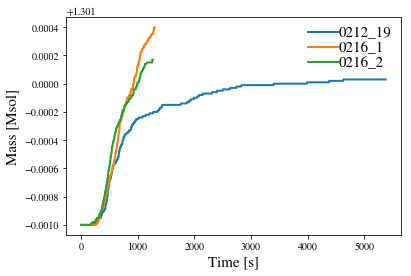

In [19]:
# plt.plot(dataTable1['t']*TimeUnit,dataTable1['M_star'],label='0212_1')
# plt.plot(dataTable2['t']*TimeUnit,dataTable2['M_star'],label='0212_2')
# plt.plot(dataTable3['t']*TimeUnit,dataTable3['M_star'],label='0212_3')
# plt.plot(dataTable4['t']*TimeUnit,dataTable4['M_star'],label='0212_4')
# plt.plot(dataTable5['t']*TimeUnit,dataTable5['M_star'],label='0212_5')
# plt.plot(dataTable6['t']*TimeUnit,dataTable6['M_star'],label='0212_6')
# plt.plot(dataTable7['t']*TimeUnit,dataTable7['M_star'],label='0212_7')
# plt.plot(dataTable8['t']*TimeUnit,dataTable8['M_star'],label='0212_8')
# plt.plot(dataTable9['t']*TimeUnit,dataTable9['M_star'],label='0212_9')
# plt.plot(dataTable10['t']*TimeUnit,dataTable10['M_star'],label='0212_10')
# plt.plot(dataTable11['t']*TimeUnit,dataTable11['M_star'],'--',label='0212_11')
# plt.plot(dataTable12['t']*TimeUnit,dataTable12['M_star'],'--',label='0212_12')

plt.plot(dataTable1['t']*TimeUnit,dataTable1['M_star'],label='0212_19')
plt.plot(dataTable2['t']*TimeUnit,dataTable2['M_star'],label='0216_1')
plt.plot(dataTable3['t']*TimeUnit,dataTable3['M_star'],label='0216_2')

plt.legend(loc='right')
plt.ylabel('Mass [Msol]')
plt.xlabel('Time [s]')

plt.legend()
plt.savefig("accretionNS_MESA10.png")

In [ ]:
print(dataTable5['M_star'][200]-dataTable5['M_star'][1])

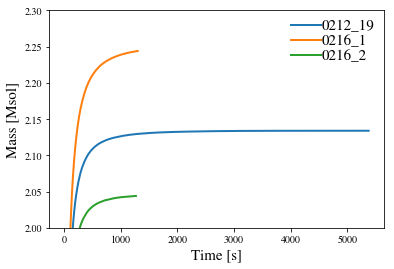

In [21]:
# plt.plot(dataTable1['t']*TimeUnit,dataTable1['M_bh'],label='0212_1')
# plt.plot(dataTable2['t']*TimeUnit,dataTable2['M_bh'],label='0212_2')
# plt.plot(dataTable3['t']*TimeUnit,dataTable3['M_bh'],label='0212_3')
# plt.plot(dataTable4['t']*TimeUnit,dataTable4['M_bh'],label='0212_4')
# plt.plot(dataTable5['t']*TimeUnit,dataTable5['M_bh'],label='0212_5')
# plt.plot(dataTable6['t']*TimeUnit,dataTable6['M_bh'],label='0212_6')
# plt.plot(dataTable7['t']*TimeUnit,dataTable7['M_bh'],label='0212_7')
# plt.plot(dataTable8['t']*TimeUnit,dataTable8['M_bh'],label='0212_8')
# plt.plot(dataTable9['t']*TimeUnit,dataTable9['M_bh'],label='0212_9')
# plt.plot(dataTable10['t']*TimeUnit,dataTable10['M_bh'],label='0212_10')
# plt.plot(dataTable11['t']*TimeUnit,dataTable11['M_bh'],'--',label='0212_11')
# plt.plot(dataTable12['t']*TimeUnit,dataTable12['M_bh'],'--',label='0212_12')

plt.plot(dataTable1['t']*TimeUnit,dataTable1['M_bh'],label='0212_19')
plt.plot(dataTable2['t']*TimeUnit,dataTable2['M_bh'],label='0216_1')
plt.plot(dataTable3['t']*TimeUnit,dataTable3['M_bh'],label='0216_2')


x = np.arange(0.0, 5, 0.1)*TimeUnit
# plt.fill_between(x, 1.6, 2.7,facecolor='yellow',label='$GW190425$', alpha=0.5,hatch='/')
# plt.fill_between(x, 1.17, 1.36,facecolor='yellow',label='$GW170817$', alpha=0.5)
# plt.fill_between(x, 1.97, 2.33,facecolor='grey',label='$M_{TOV}$')

# plt.xscale('log')
plt.legend(loc='upper right')
plt.ylabel('Mass [Msol]')
plt.xlabel('Time [s]')
# plt.xlim([0, 10])
plt.ylim([2.0, 2.3])
plt.savefig("accretionExplodingStar_MESA10_convergence.png")

In [ ]:
print(dataTable1['M_bh'][-1])
print(dataTable2['M_bh'][-1])
print(dataTable3['M_bh'][-1])
print(100*np.abs(dataTable2['M_bh'][-1]-dataTable3['M_bh'][-1])/dataTable2['M_bh'][-1])
print(100*np.abs(dataTable2['M_bh'][-1]-dataTable1['M_bh'][-1])/dataTable2['M_bh'][-1])

In [ ]:
plt.plot(dataTable4['t'],dataTable4['M_bh'],label='0209_4')
print(TimeUnit)*0.14

In [17]:
print(dataTable1['M_bh'][-1])
print(dataTable2['M_bh'][-1])
print(dataTable3['M_bh'][-1])
print(dataTable4['M_bh'][-1])
print(dataTable5['M_bh'][-1])
print(dataTable6['M_bh'][-1])
print(dataTable7['M_bh'][-1])
print(dataTable8['M_bh'][-1])
print(dataTable9['M_bh'][-1])
print(dataTable10['M_bh'][-1])
print(dataTable11['M_bh'][-1])
print(dataTable12['M_bh'][-1])

5.31992
5.10669
4.6713
4.14241
3.53299
2.50759
2.07921
1.88539
1.70137
1.49618
1.3954
1.35459


In [ ]:
# spin already accreted
def spin(dyn):
    Lacc = (np.sqrt(dyn['LaccZ_bh']**2))*AngMomUnit
    bh_spin = Lacc*c/(G*(dyn['M_bh']*Mo)**2)
    return bh_spin

In [ ]:
spinBH = spin(dataTable)

In [ ]:
plt.plot(dataTable['t'],spinBH)

In [ ]:
pwd